<a href="https://colab.research.google.com/github/ranamaddy/MachineLearning/blob/main/Crop_Recommendation_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

**About Dataset**


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Crop_recommendation.csv')

In [128]:
# **DATA PROCESSING**

import pandas as pd # Data Processing
import numpy as np # Array Processing
import os # Data Importing

# **DATA ANALYSIS**

import matplotlib.pyplot as plt # Plots 
import seaborn as sns # Graphs

# **PRE PROCESSING**

from sklearn.preprocessing import FunctionTransformer  # Transforming of Data
from sklearn.preprocessing import OneHotEncoder # Data Encoding
from sklearn.preprocessing import StandardScaler # Data Scaling
from imblearn.over_sampling import RandomOverSampler # Data OverSampling
from sklearn.decomposition import PCA # Principal Component Analysis

# **MODELS** 

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# **NERURAL NETWORKS**

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# **METRICS**

from sklearn.metrics import accuracy_score # Model Classification Report

In [4]:
import pandas as pd # Data Processing
import numpy as np
stroke_data = pd.read_csv('/content/drive/MyDrive/Crop_recommendation.csv')
print(stroke_data)

        N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]


**to read data from dataset**

In [5]:
stroke_data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


**show data from tail**

In [6]:
stroke_data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [7]:
type(stroke_data)

pandas.core.frame.DataFrame

# **Exploring Data**

In [8]:
stroke_data.sample(4)

,N,P,K,temperature,humidity,ph,rainfall,label
1747,34,65,48,41.419684,90.038631,6.665025,199.309643,papaya
202,39,58,85,17.887765,15.405897,5.996932,68.549329,chickpea
530,22,44,24,24.309351,56.329383,6.030447,58.995363,mothbeans
1214,32,141,204,8.825675,82.897537,5.536646,67.235765,grapes


# **checking data types**

In [9]:
stroke_data.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

**information of dataset**

In [10]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [11]:
stroke_data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [12]:
stroke_data.shape

(2200, 8)

In [13]:
stroke_data.ndim

2

In [14]:
stroke_data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [15]:
stroke_data["label"].nunique()

22

In [16]:
stroke_data.label.nunique()

22

In [17]:
stroke_data.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [18]:
stroke_data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [19]:
stroke_data.head(4)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice


In [20]:
stroke_data.label.value_counts(True)

rice           0.045455
maize          0.045455
jute           0.045455
cotton         0.045455
coconut        0.045455
papaya         0.045455
orange         0.045455
apple          0.045455
muskmelon      0.045455
watermelon     0.045455
grapes         0.045455
mango          0.045455
banana         0.045455
pomegranate    0.045455
lentil         0.045455
blackgram      0.045455
mungbean       0.045455
mothbeans      0.045455
pigeonpeas     0.045455
kidneybeans    0.045455
chickpea       0.045455
coffee         0.045455
Name: label, dtype: float64

In [21]:
stroke_data.label.value_counts().rename('count'),

stroke_data.label.value_counts(True).rename('%').mul(100)

rice           4.545455
maize          4.545455
jute           4.545455
cotton         4.545455
coconut        4.545455
papaya         4.545455
orange         4.545455
apple          4.545455
muskmelon      4.545455
watermelon     4.545455
grapes         4.545455
mango          4.545455
banana         4.545455
pomegranate    4.545455
lentil         4.545455
blackgram      4.545455
mungbean       4.545455
mothbeans      4.545455
pigeonpeas     4.545455
kidneybeans    4.545455
chickpea       4.545455
coffee         4.545455
Name: %, dtype: float64

In [22]:
stroke_data["label"].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

**read 20 sampel data  from datset**

In [23]:
stroke_data["label"].sample(20)

1678         orange
2053           jute
1251         grapes
134           maize
1964         cotton
583       mothbeans
1138          mango
2046           jute
1244         grapes
130           maize
418      pigeonpeas
1954         cotton
1519          apple
1              rice
559       mothbeans
350     kidneybeans
1768         papaya
1481      muskmelon
1287         grapes
186           maize
Name: label, dtype: object

In [24]:
stroke_data.label.value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

Text(0.5, 1.0, 'Number of cropes')

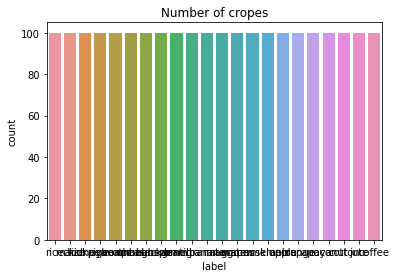

In [25]:
# Show Number of Patient by Stroke 
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=stroke_data , x='label')
plt.title('Number of cropes')

In [26]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [27]:
stroke_data.sample(20)

,N,P,K,temperature,humidity,ph,rainfall,label
1266,40,121,199,26.181597,81.038863,6.315586,66.059117,grapes
1966,127,53,24,22.215070,76.178519,6.127940,70.405576,cotton
1842,17,11,32,28.740133,93.396765,5.620734,156.765082,coconut
699,25,48,21,28.438097,83.489914,6.267684,52.554700,mungbean
1045,82,78,46,25.058022,84.973237,5.738679,110.440880,banana
1339,80,16,46,25.504055,81.402974,6.940236,48.478333,watermelon
1122,30,17,31,31.204782,54.499605,6.804437,94.629547,mango
246,52,60,79,19.453399,18.234907,8.380185,75.631757,chickpea
2046,60,55,36,26.127972,80.491726,7.132389,150.632687,jute
772,21,80,20,28.206673,68.270852,7.350870,64.328871,blackgram


**features name**

In [28]:
stroke_data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

**Missing Values**

In [29]:
stroke_data.isnull()

,N,P,K,temperature,humidity,ph,rainfall,label
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,False,False,False
2197,False,False,False,False,False,False,False,False
2198,False,False,False,False,False,False,False,False


***chek any null value ***

In [30]:
stroke_data.isnull().any()

N              False
P              False
K              False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool

In [31]:
stroke_data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [32]:
print('Missing data sum :')
print(stroke_data.isnull().sum())

print('\nMissing data percentage (%):')
print(stroke_data.isnull().sum()/stroke_data.count()*100)

Missing data sum :
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Missing data percentage (%):
N              0.0
P              0.0
K              0.0
temperature    0.0
humidity       0.0
ph             0.0
rainfall       0.0
label          0.0
dtype: float64


**Seperate Categorical and Numerical Features**

In [33]:
cat_features = [feature for feature in stroke_data.columns if stroke_data[feature].dtypes == 'O']
print('Number of categorical variables: ', len(cat_features))
print('*'*80)
print('Categorical variables column name:',cat_features)

Number of categorical variables:  1
********************************************************************************
Categorical variables column name: ['label']


In [34]:
cd = pd.DataFrame(cat_features)
cd.head()

,0
0,label


In [35]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [36]:
numerical_features = [feature for feature in stroke_data.columns if stroke_data[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print('*'*80)
print('Numerical Variables Column: ',numerical_features)

Number of numerical variables:  7
********************************************************************************
Numerical Variables Column:  ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


In [37]:
numerical_features

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

In [38]:
cat_features

['label']

**Checking Duplicating Values**

In [39]:
stroke_data.humidity.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2195    False
2196    False
2197    False
2198    False
2199    False
Name: humidity, Length: 2200, dtype: bool

In [40]:
stroke_data.ph.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2195    False
2196    False
2197    False
2198    False
2199    False
Name: ph, Length: 2200, dtype: bool

In [41]:
stroke_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2195    False
2196    False
2197    False
2198    False
2199    False
Length: 2200, dtype: bool

In [42]:
stroke_data.duplicated().sum()

0

In [43]:
stroke_data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [44]:
stroke_data['ph'].unique()

array([6.50298529, 7.03809636, 7.84020714, ..., 6.36260785, 6.75879255,
       6.77983261])

In [45]:
stroke_data['ph'].sample(10)

708     7.543804
805     6.410441
1260    5.693287
893     7.327110
68      5.012140
2199    6.779833
1642    6.157135
1270    6.313086
1802    5.686973
2099    7.261581
Name: ph, dtype: float64

In [46]:
stroke_data['N'].sample(10)

1930    118
316      22
2064     89
2032     67
1637      6
2141     80
269      34
820       4
1304     93
1659     39
Name: N, dtype: int64

In [47]:
stroke_data['temperature'].sample(10)

1783    25.930038
884     25.712698
1908    23.605640
1591    23.640830
959     23.891626
1578    21.724845
437     30.977587
221     20.093406
122     18.283622
973     19.301063
Name: temperature, dtype: float64

In [48]:
stroke_data['N'].unique()

array([ 90,  85,  60,  74,  78,  69,  94,  89,  68,  91,  93,  77,  88,
        76,  67,  83,  98,  66,  97,  84,  73,  92,  95,  99,  63,  62,
        64,  82,  79,  65,  75,  71,  72,  70,  86,  61,  81,  80, 100,
        87,  96,  40,  23,  39,  22,  36,  32,  58,  59,  42,  28,  43,
        27,  50,  25,  31,  26,  54,  57,  49,  46,  38,  35,  52,  44,
        24,  29,  20,  56,  37,  51,  41,  34,  30,  33,  47,  53,  45,
        48,  13,   2,  17,  12,   6,  10,  19,  11,  18,  21,  16,   9,
         1,   7,   8,   0,   3,   4,   5,  14,  15,  55, 105, 108, 118,
       101, 106, 109, 117, 114, 110, 112, 111, 102, 116, 119, 107, 104,
       103, 120, 113, 115, 133, 136, 126, 121, 129, 122, 140, 131, 135,
       123, 125, 139, 132, 127, 130, 134])

In [49]:
stroke_data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases. The diagonals are all 1/dark green because those squares are correlating each variable to itself (so it's a perfect correlation). For the rest the larger the number and darker the color the higher the correlation between the two variables. The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.

[Text(0.5, 1.0, 'Correlation Matrix')]

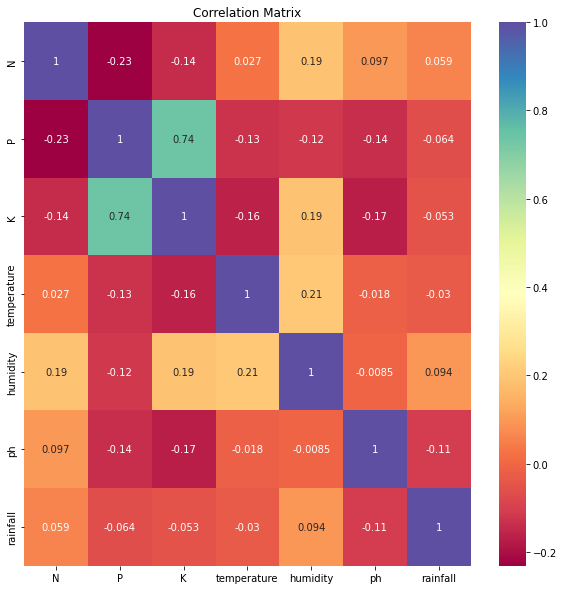

In [50]:
# Correlation matrix
corr = stroke_data.corr() 
plt.figure(figsize=(10,10))
sns.heatmap(data=corr, annot=True, cmap='Spectral').set(title="Correlation Matrix")

<Axes: >

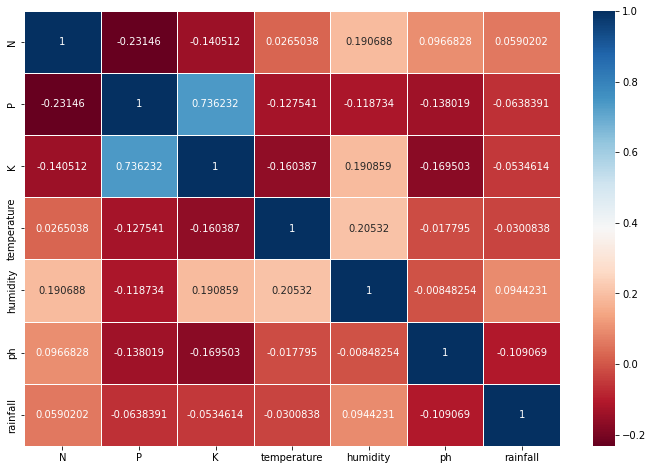

In [51]:
fig = plt.figure(figsize=(12,8))
corr = stroke_data.corr()
sns.heatmap(corr, linewidths=.5, cmap="RdBu", annot=True, fmt="g")

In [52]:
corr_matrix = stroke_data.corr().round(2)
corr_matrix  

,N,P,K,temperature,humidity,ph,rainfall
N,1.00,-0.23,-0.14,0.03,0.19,0.10,0.06
P,-0.23,1.00,0.74,-0.13,-0.12,-0.14,-0.06
K,-0.14,0.74,1.00,-0.16,0.19,-0.17,-0.05
temperature,0.03,-0.13,-0.16,1.00,0.21,-0.02,-0.03
humidity,0.19,-0.12,0.19,0.21,1.00,-0.01,0.09
ph,0.10,-0.14,-0.17,-0.02,-0.01,1.00,-0.11
rainfall,0.06,-0.06,-0.05,-0.03,0.09,-0.11,1.00


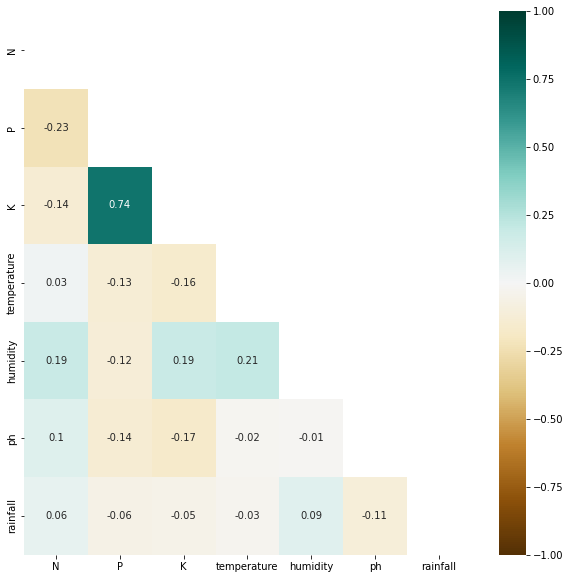

In [53]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, center=0, vmin=-1, vmax=1, mask=mask, annot=True, cmap='BrBG')
plt.show()

In [54]:
numerical_features = [feature for feature in stroke_data.columns if stroke_data[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print('*'*80)
print('Numerical Variables Column: ',numerical_features)

Number of numerical variables:  7
********************************************************************************
Numerical Variables Column:  ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


**Visualizing Categorical Features**

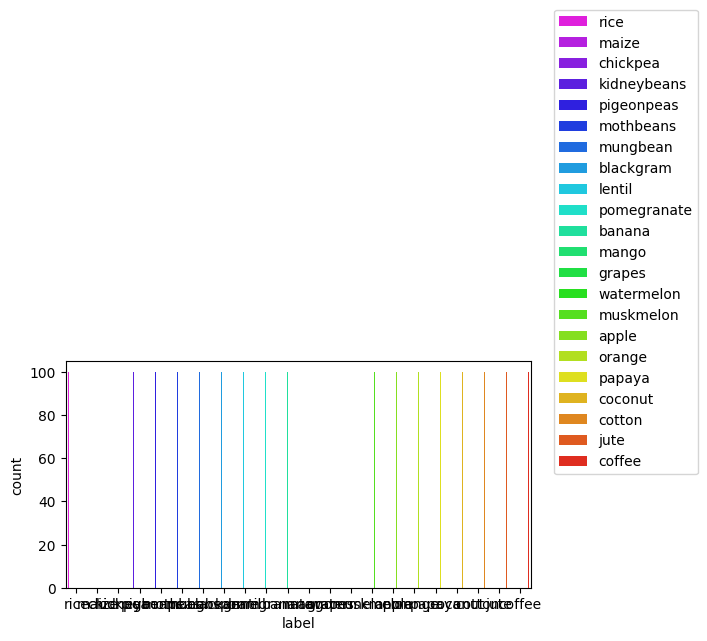

In [55]:
for col in cat_features[:]:
    plt.figure(figsize=(6,3), dpi=100)
    sns.countplot(data=stroke_data,x=col,hue ='label',palette='gist_rainbow_r')
    plt.legend(loc=(1.05,0.5))

**Barplot of numerical features:**

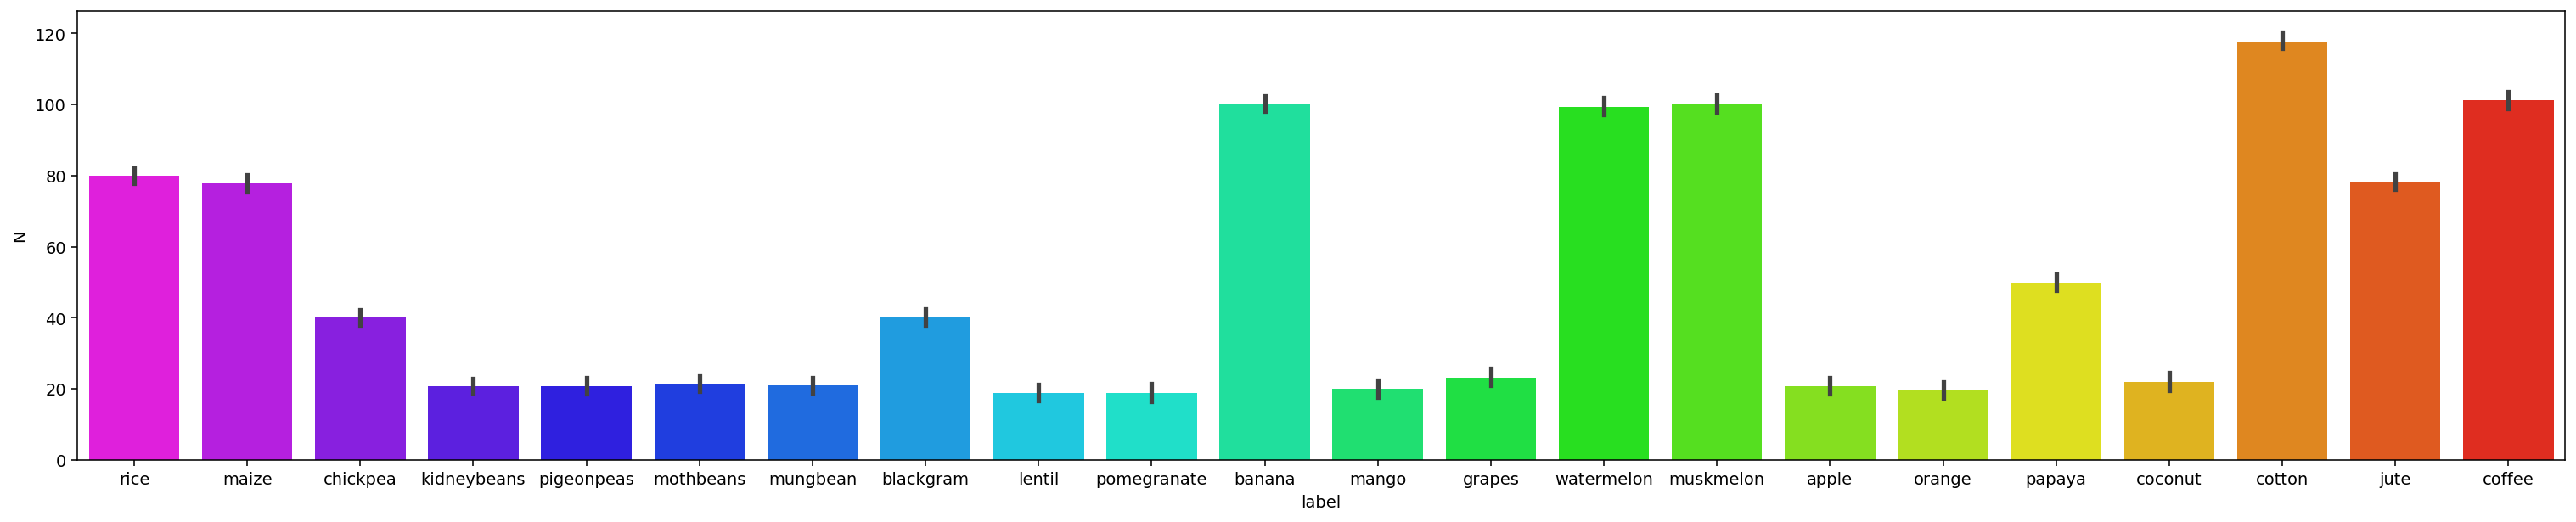

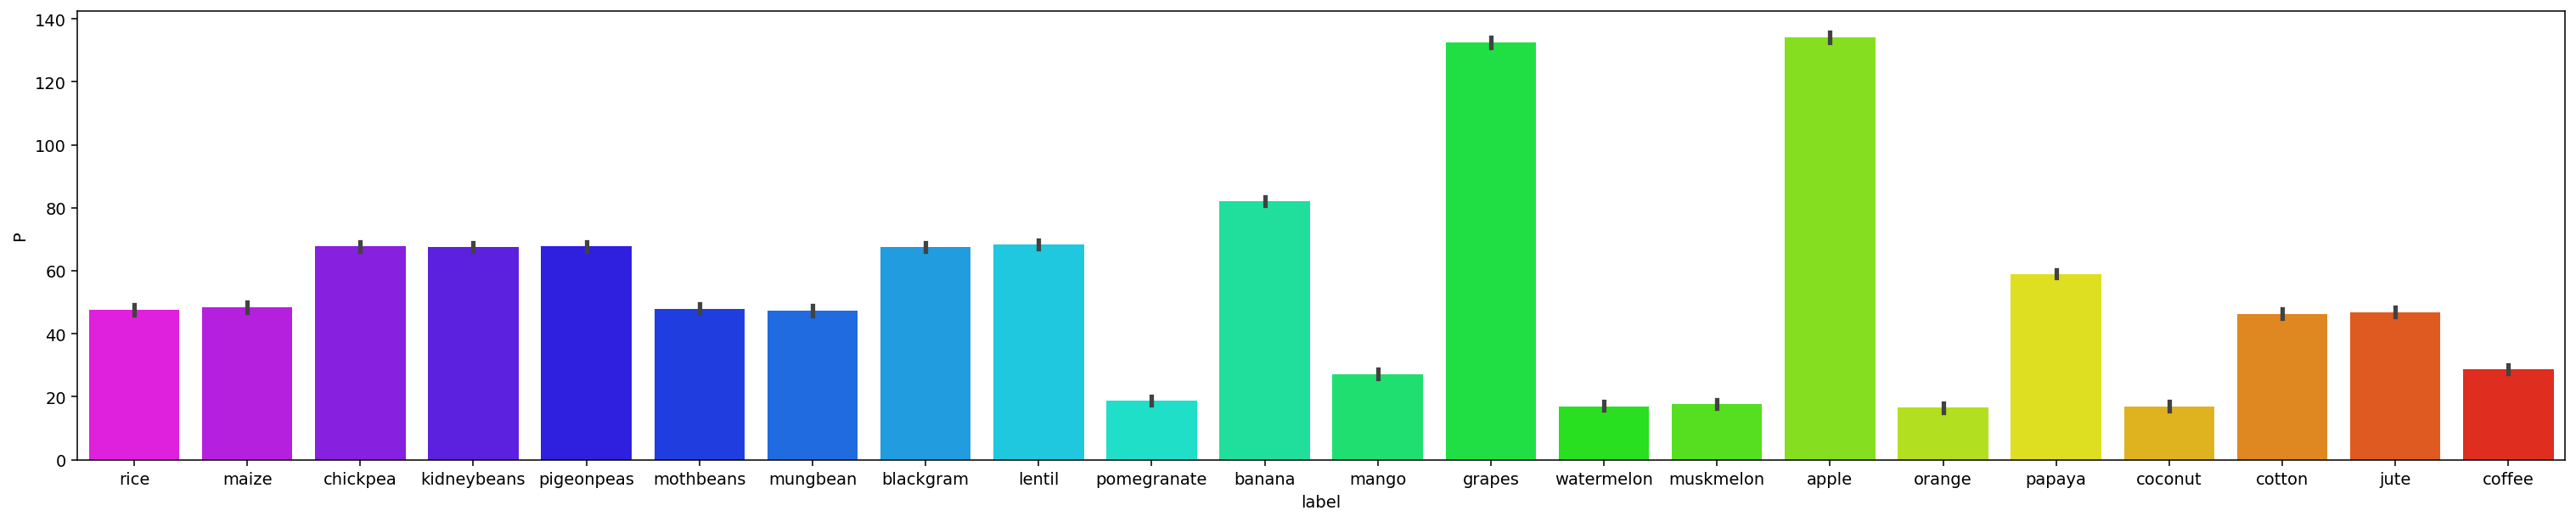

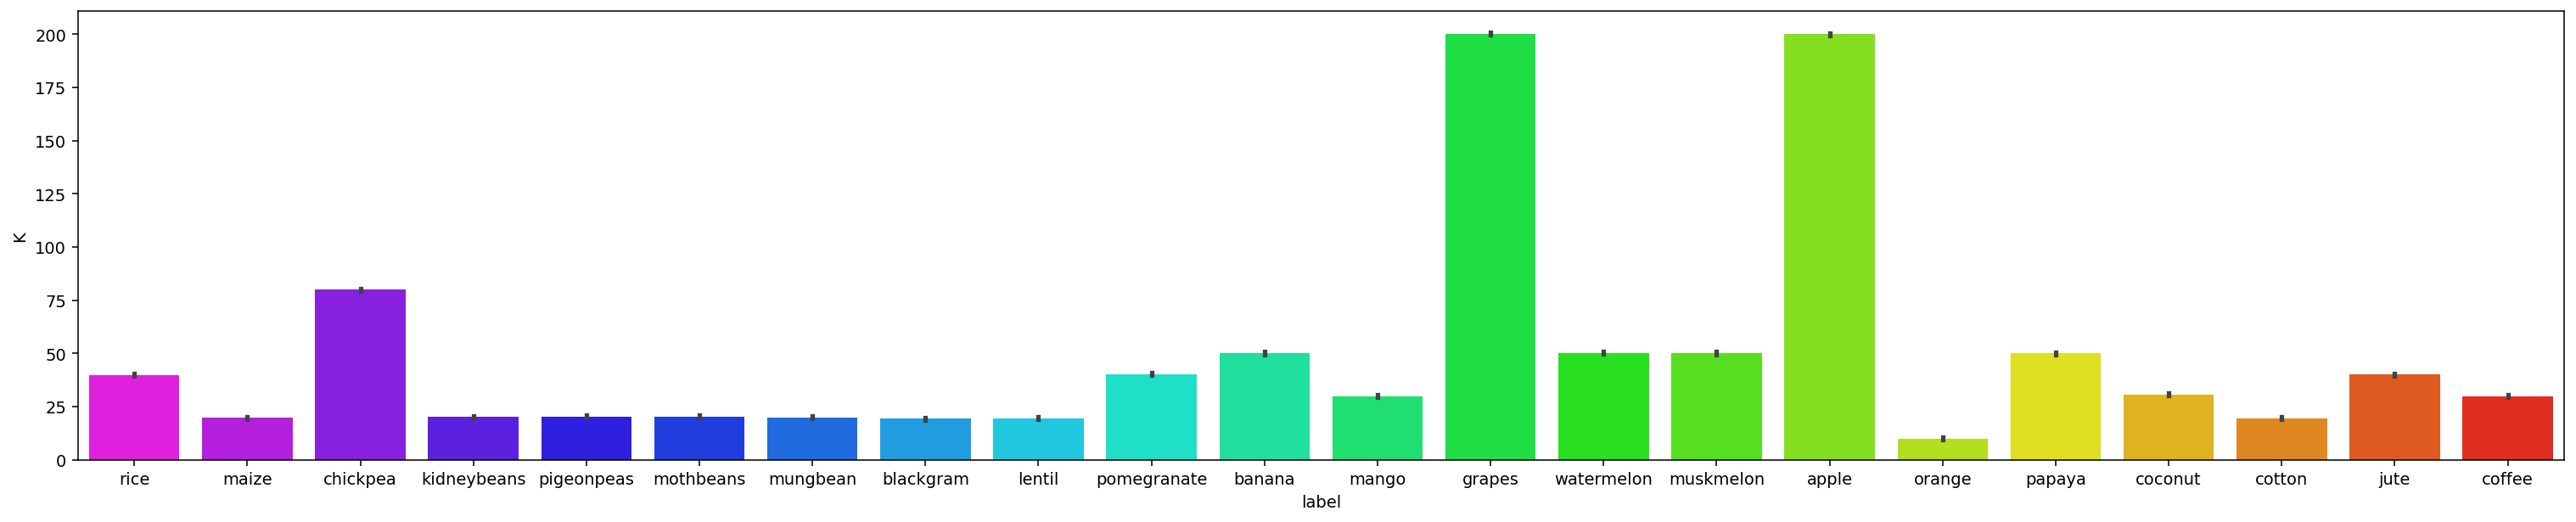

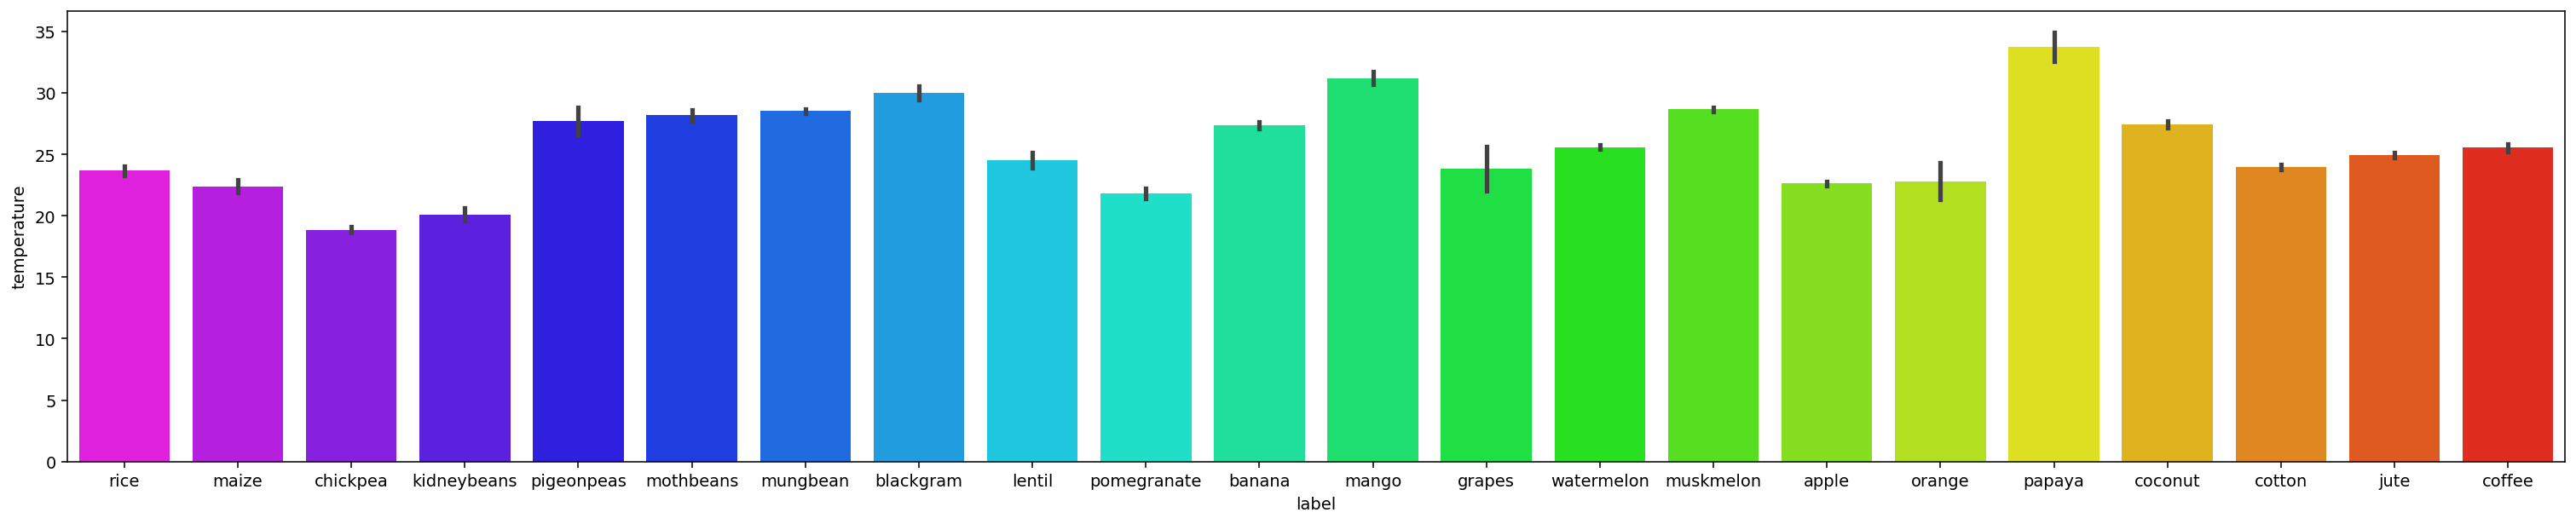

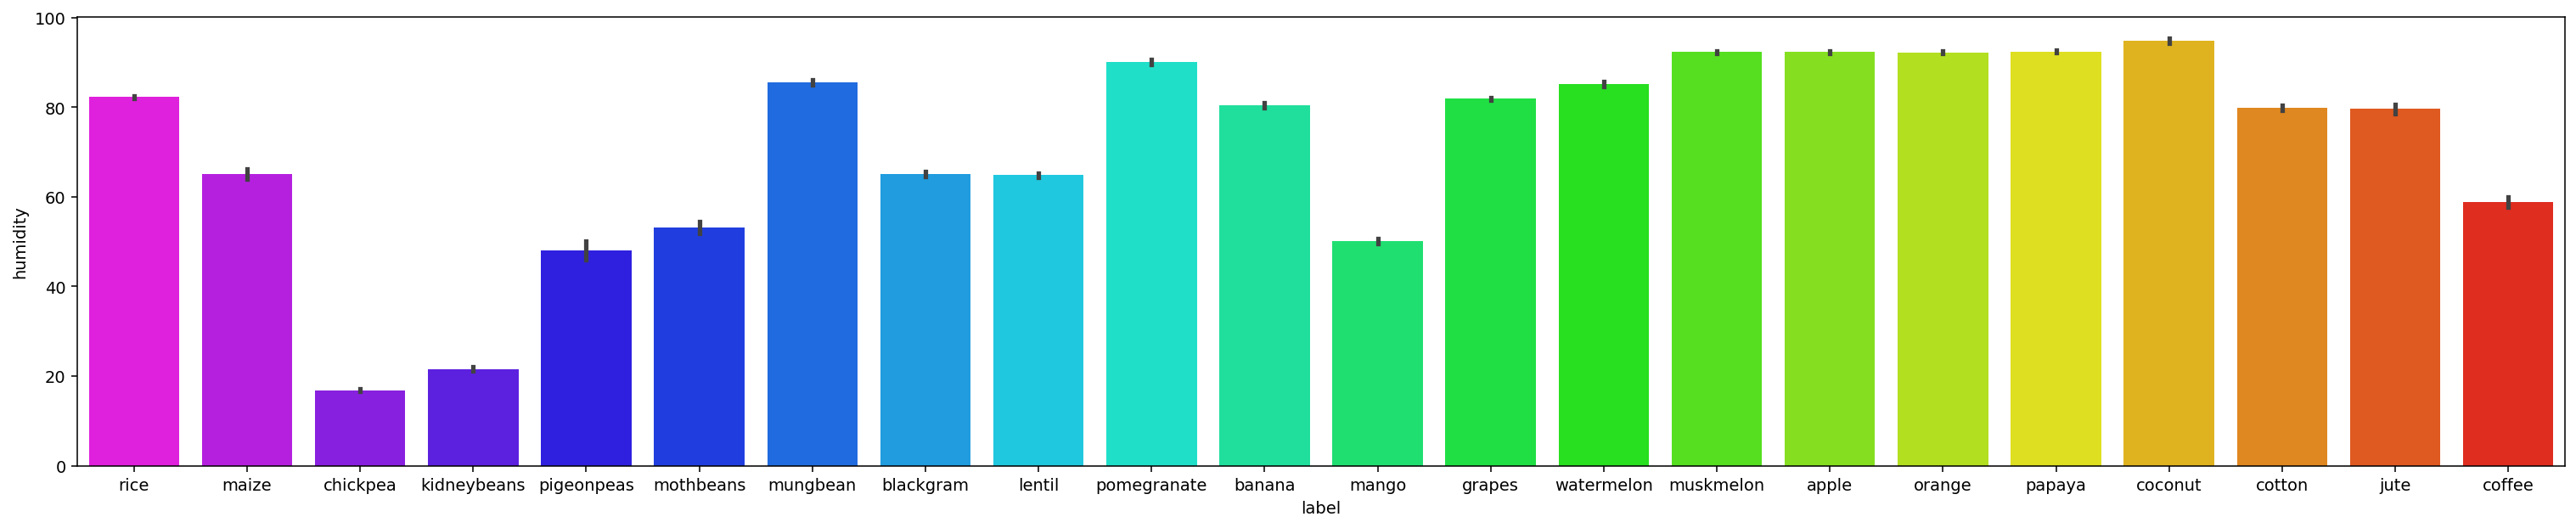

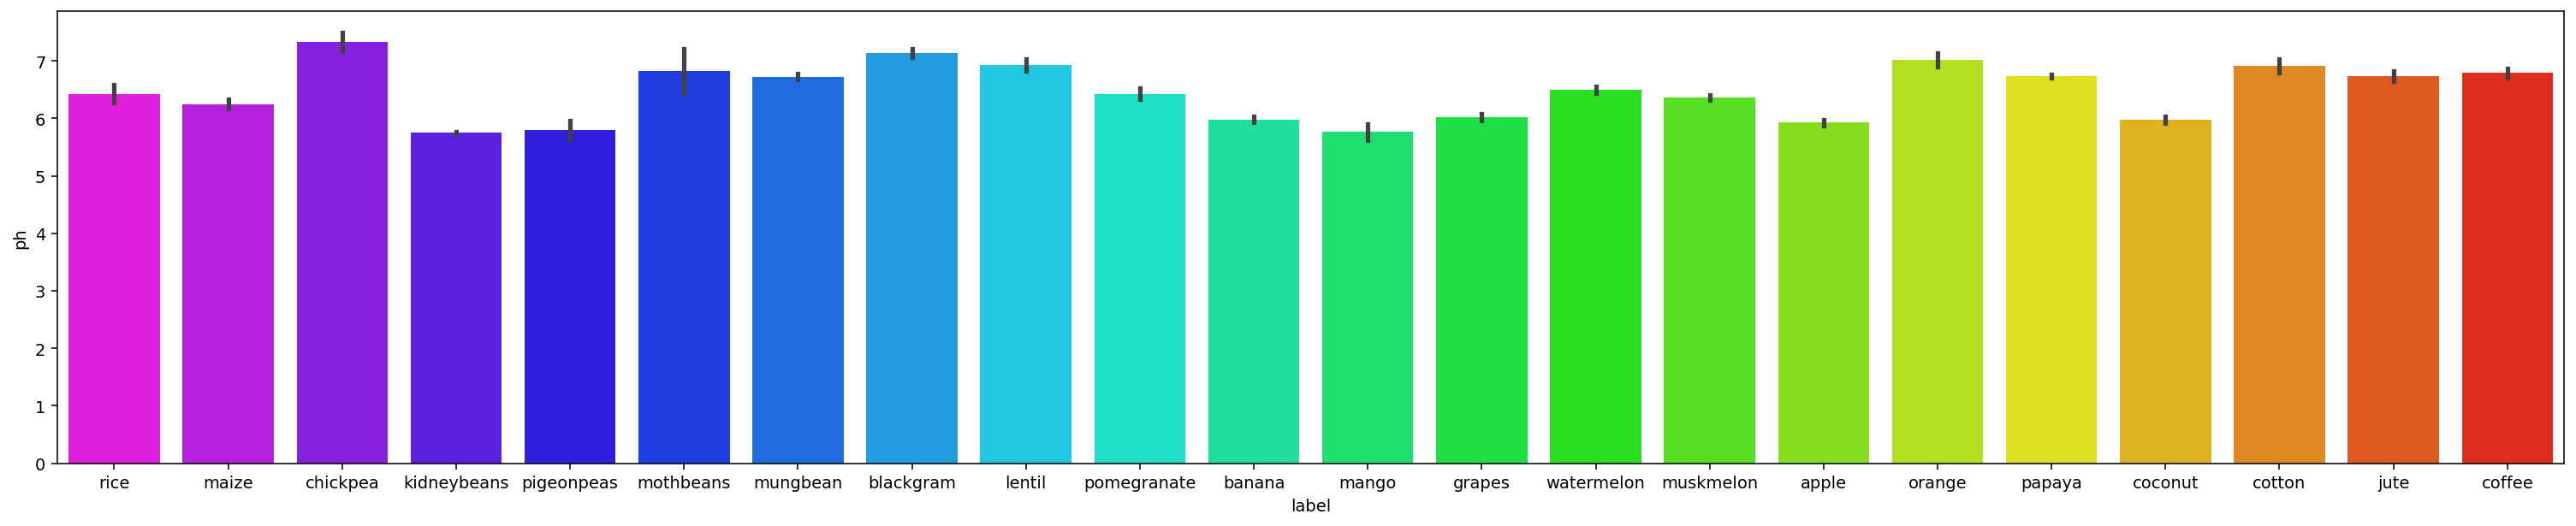

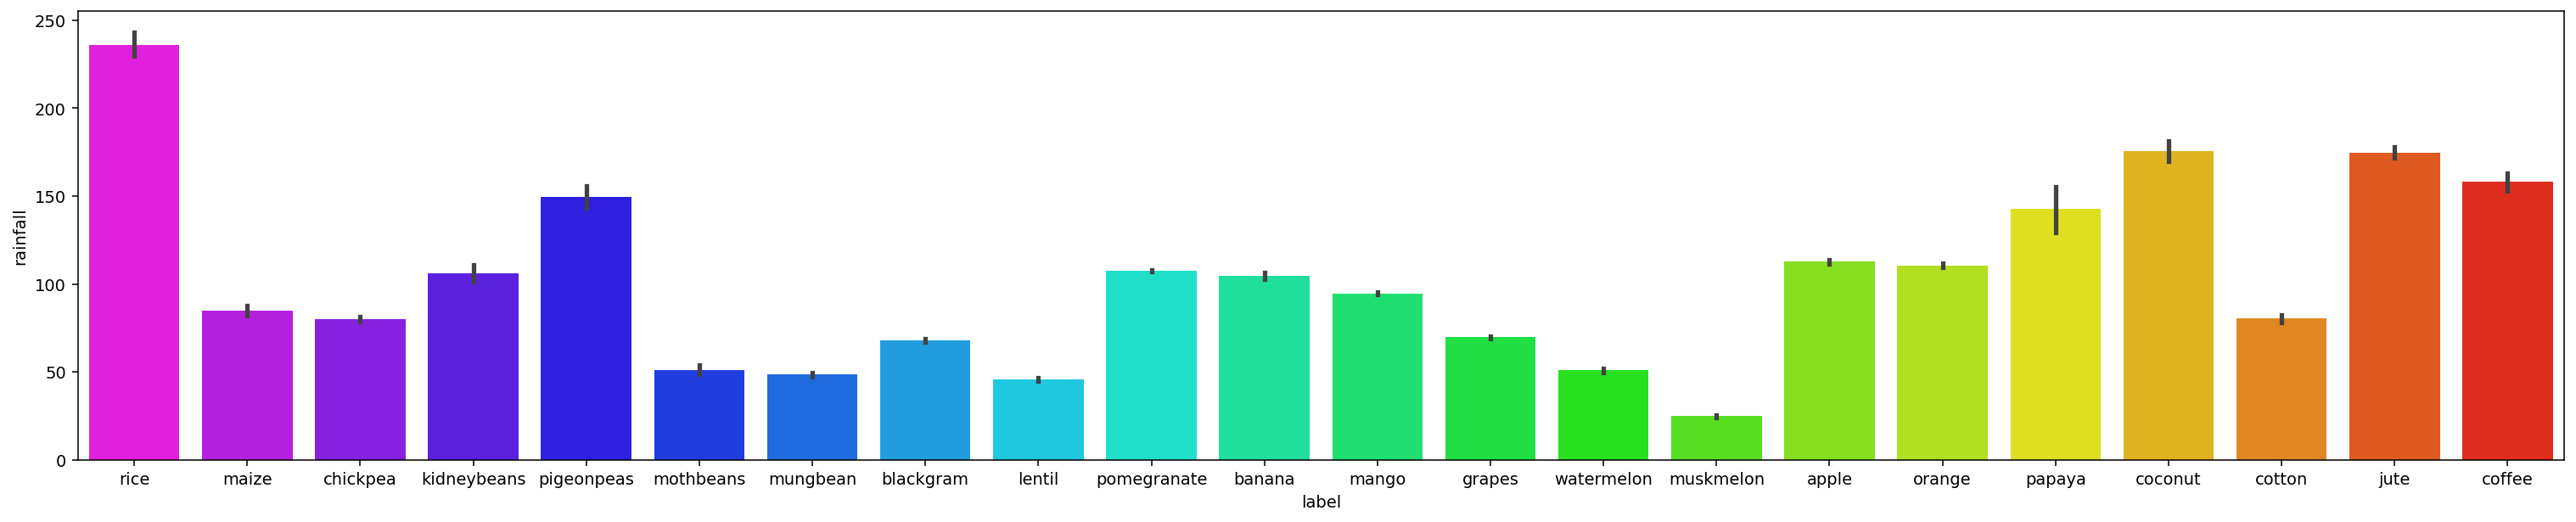

In [56]:
#Plotting the barplot of numerical features
for col in numerical_features:
    plt.figure(figsize=(27,5), dpi=140)
    sns.barplot(data=stroke_data,x='label',y=col,palette='gist_rainbow_r')

In [57]:
stroke_data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [58]:


train  = stroke_data
train

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [59]:
train.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [60]:
train.shape

(2200, 8)

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [62]:
train_data_cat = train.select_dtypes("object")
train_data_num = train.select_dtypes("number")

In [63]:
train_data_cat.head(10)

,label
0,rice
1,rice
2,rice
3,rice
4,rice
5,rice
6,rice
7,rice
8,rice
9,rice


In [64]:
train_data_num.head(3)

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248


**Converting categorical features into numerical**

In [65]:
train_data_cata_encoded=pd.get_dummies(train_data_cat, columns=train_data_cat.columns.to_list())
train_data_cata_encoded.head()

,label_apple,label_banana,label_blackgram,label_chickpea,label_coconut,label_coffee,label_cotton,label_grapes,label_jute,label_kidneybeans,...,label_mango,label_mothbeans,label_mungbean,label_muskmelon,label_orange,label_papaya,label_pigeonpeas,label_pomegranate,label_rice,label_watermelon
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [66]:
data=pd.concat([train_data_cata_encoded,train_data_num],axis=1,join="outer")
data.head()

,label_apple,label_banana,label_blackgram,label_chickpea,label_coconut,label_coffee,label_cotton,label_grapes,label_jute,label_kidneybeans,...,label_pomegranate,label_rice,label_watermelon,N,P,K,temperature,humidity,ph,rainfall
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,85,58,41,21.770462,80.319644,7.038096,226.655537
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,60,55,44,23.004459,82.320763,7.840207,263.964248
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,74,35,40,26.491096,80.158363,6.980401,242.864034
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,78,42,42,20.130175,81.604873,7.628473,262.717340


In [67]:
data

,label_apple,label_banana,label_blackgram,label_chickpea,label_coconut,label_coffee,label_cotton,label_grapes,label_jute,label_kidneybeans,...,label_pomegranate,label_rice,label_watermelon,N,P,K,temperature,humidity,ph,rainfall
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,85,58,41,21.770462,80.319644,7.038096,226.655537
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,60,55,44,23.004459,82.320763,7.840207,263.964248
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,74,35,40,26.491096,80.158363,6.980401,242.864034
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,0,0,0,0,0,1,0,0,0,0,...,0,0,0,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,0,0,0,0,0,1,0,0,0,0,...,0,0,0,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,0,0,0,0,0,1,0,0,0,0,...,0,0,0,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,0,0,0,0,0,1,0,0,0,0,...,0,0,0,117,32,34,26.272418,52.127394,6.758793,127.175293


**seperate dependant and independant featur**

In [68]:
y = data['rainfall']
x = data.drop('rainfall', axis = 1)

In [69]:
print(x.shape)
print(y.shape)

(2200, 28)
(2200,)


**scailing the data**

In [70]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [71]:
x

array([[-0.21821789, -0.21821789, -0.21821789, ..., -0.93558693,
         0.47266646,  0.04330173],
       [-0.21821789, -0.21821789, -0.21821789, ..., -0.75964603,
         0.39705125,  0.73487256],
       [-0.21821789, -0.21821789, -0.21821789, ..., -0.51589814,
         0.48695381,  1.77151047],
       ...,
       [-0.21821789, -0.21821789, -0.21821789, ..., -0.29321843,
        -0.19123516, -0.13812031],
       [-0.21821789, -0.21821789, -0.21821789, ...,  0.12961223,
        -0.86951801,  0.37390383],
       [-0.21821789, -0.21821789, -0.21821789, ..., -0.39766703,
        -0.49802006,  0.40109573]])

**Splitting data into Training and Testing**

In [72]:
#Importing our ML toolkit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.svm import SVC
import pickle

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

**Splitting the dataset**
training data 70%
testing data 30%

In [79]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)
X_train.shape, X_test.shape

((1540, 28), (660, 28))

In [74]:
y_train

2002    196.624951
2194    166.254931
1165     91.011530
1490     20.765821
164      83.210306
           ...    
211      74.585651
1603    114.665951
537      66.176146
1220     72.242308
175      75.822705
Name: rainfall, Length: 1540, dtype: float64

**Building Classifiers**

In [75]:
accuracy = {}

**Logistic Regression**

In [77]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
# idhar wo data
lr_model.fit(X_train, y_train)

LinearRegression()

In [78]:
from sklearn.svm import SVR
svm_model = SVR()


svm_model.fit(X_train, y_train)

SVR()

In [85]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred1 = lr.predict(X_test)
#print(accuracy_score(y_test, y_pred1))
#accuracy[str(lr)] = accuracy_score(y_test, y_pred1)*100
y_pred1

array([169.96138058, 234.77388058,  78.75825558,  81.38325558,
        66.37544308, 235.89106808,  81.65669308,  23.10981808,
        43.82075558,  51.68013058, 102.77388058,  66.40669308,
        45.16450558,  70.29731808,  84.84419308,  48.90669308,
        48.84419308,  93.52388058, 111.62544308, 106.89106808,
        46.86763058,  67.77388058, 113.49263058, 140.58638058,
        96.45356808,  64.57856808, 104.60981808,  46.14888058,
       151.29731808,  42.26606808,  82.39888058,  93.04731808,
       106.43013058, 105.07856808, 113.42231808, 239.03169308,
        48.39888058,  67.67231808, 150.06294308,  48.82856808,
        66.61763058,  82.21919308,  51.67231808, 111.18794308,
       149.57856808,  27.03169308, 110.78169308, 108.25825558,
        94.49263058,  78.92231808,  80.48481808,  69.54731808,
       172.73481808,  79.10200558,  47.85200558, 237.14888058,
        50.66450558, 150.25825558,  44.87544308,  83.87544308,
       111.95356808,  66.77388058, 107.15669308,  48.16

In [90]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred1)
mse

457.87393344024787

In [95]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred1)
mae

14.06957482546508

In [98]:
y_pred_test = lr.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

In [99]:
test.sample(10)

,Actual,Y test predicted
328,100.671176,107.055131
467,182.268818,148.102006
2128,191.398067,159.352006
1200,67.125345,71.414506
377,88.887961,107.859818
1307,59.463386,50.344193
95,194.265172,235.422318
738,66.371712,67.992631
1125,90.286243,93.969193
426,186.500858,148.828568


In [114]:
# machine learnig on csv file methos basics 
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Loading the dataset
data = pd.read_csv('/content/drive/MyDrive/Crop_recommendation.csv')

# Splitting the dataset into features and target variable
X = data.drop('label', axis=1)
y = data['label']

# Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating an instance of Linear Regression model
lr = LinearRegression()
# Fitting the model on the training data
lr.fit(X_train, y_train)  # could not convert string to float: 'orange' error in this line The error "could not convert string to float: 'orange'" suggests that there is a non-numeric value in the dataset. We need to check the dataset and convert any non-numeric values to numeric values before fitting the model. Here's an updated code:
# Importing necessary libraries






# Predicting on the test data
y_pred = lr.predict(X_test)
# Calculating the mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

ValueError: ignored

In [127]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Loading the dataset

data = pd.read_csv('/content/drive/MyDrive/Crop_recommendation.csv')
# Checking for non-numeric values in the dataset

print(data.dtypes)
# Converting non-numeric values to numeric values

data['label'] = pd.factorize(data['label'])[0]
# Splitting the dataset into features and target variable

X = data.drop('label', axis=1)
y = data['label']
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fitting the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
# Printing the coefficients and intercept of the linear regression model
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)
# Predicting the target variable using the linear regression model
y_pred = lr.predict(X_test)
# Calculating the mean squared error of the linear regression model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Importing the necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Fitting the decision tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
# Predicting the target variable using the decision tree classifier
y_pred = dt.predict(X_test)
# Calculating the accuracy of the decision tree classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Importing the necessary libraries
from sklearn.ensemble import RandomForestClassifier
# Fitting the random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
# Predicting the target variable using the random forest classifier
y_pred = rf.predict(X_test)
# Calculating the accuracy of the random forest classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Importing the necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Fitting the support vector machine classifier

svm = SVC()
svm.fit(X_train, y_train)
# Predicting the target variable using the support vector machine classifier
y_pred = svm.predict(X_test)
# Calculating the accuracy of the support vector machine classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Importing the necessary libraries

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Fitting the logistic regression classifier

lr = LogisticRegression()
lr.fit(X_train, y_train)
# Predicting the target variable using the logistic regression classifier
y_pred = lr.predict(X_test)
# Calculating the accuracy of the logistic regression classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



# Importing the necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Fitting the decision tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
# Predicting the target variable using the decision tree classifier
y_pred = dt.predict(X_test)
# Calculating the accuracy of the decision tree classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object
Coefficients: [ 0.0308931  -0.06627372  0.04921468  0.15265476  0.09595374  0.63933752
  0.00894248]
Intercept: -5.686241317892829
Mean Squared Error: 24.55558695720143
Accuracy: 0.9886363636363636
Accuracy: 0.9931818181818182
Accuracy: 0.9613636363636363
Accuracy: 0.9454545454545454
Accuracy: 0.9886363636363636


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
